<p class="pull-left">
ANLT 212 - Analytics Computing
</p>
<div class="pull-right">
<ul class="list-inline">
Copyright © Dana Nehoran 2017
</ul>
</div>

<div style="background-color: #A378AF; border:1px solid #000; margin-left: 2px; margin-right: 2px; 
padding-bottom: 2px; padding-left: 2px; padding-right: 1px; padding-top: 10px;">
<center><b><font size="6">Group Project 2 - Python Project</font></b></center>
</div>

Student Names:

<center><font size = 10>Tyler Norlund & Edwin Ramirez</font></center>

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 1:</b> Project Definition</blockquote> 

Select a dataset from the UCI Machine Learning Repository 
http://archive.ics.uci.edu/ml/datasets.html
Your dataset should be different from the one utilized on project 1. 

Describe your stakeholder. Who is the potential sponsor of your project? For example: a real estate investor, the police department, a city mayor, etc. Explain what is the objective of this project and its justification. What are the findings so far, and what is your objective.

Note: <br>
If you want to select a dataset from a different public repository, you can.


<b><font color="blue" size = 4>a)</font> Data Selection</b>: Explain why this data was selected. What are the overall characteristics of the data.

In this project, we use the [Spotify API](https://developer.spotify.com/). This was done in python using the [Spotipy](https://spotipy.readthedocs.io/en/latest/#) python library. Using python, we obtained Spotify's top playlists and stored each playlist in a CSV format.

In [2]:
import matplotlib.pyplot as plt
import os
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from pandas import DataFrame
from os import listdir
from os.path import isfile, join
from scipy.cluster.hierarchy import fcluster
from mpl_toolkits.mplot3d import Axes3D

song_data_df = pd.read_csv('song_data.csv', index_col = 0)
song_info_df = pd.read_csv('song_info.csv', index_col = 0)

<b><font color="blue" size = 4>b)</font> Stakeholder</b>: Describe your stakeholder. Who is the potential sponsor of your project? For example: a real estate investor, the police department, a city mayor, etc. 

Spotify and their investors would be the potential sponsors of this project. This project would primarily focus on improving Spotify's recommendation system that focuses on introducing its users to new music. This could potentially be used to compete against other music streaming platforms, such as Pandora, Google Play Music, Apple Music etc. One of the reasons it is important to have a proper recommendation system is that it keeps the users active on the apps, and if the accuracy of recommending similar music improves, this could potentially bring new users.

<b><font color="blue" size = 4>c)</font> Objective</b>: Project objective, justification, expected outcome. How your results may impact your stake holders. Which decisions or changes will the stakeholder be able to make based on this project

In this project we will classify songs based on similarities of audio features defined in the Spotify API. It is our understanding that Spotify recommends new music to their users by storing data on songs that users like, and by comparing this data to other users. Our objective isn't to recommend songs based off of similar user behavior, but rather to analyze the audio features of each song and categorize them based off of these features. This would help imrpove Spotify's recommendation system when utilized in conjunction with recommendations based off of user behavior. 

<b><font color="blue" size = 4>d)</font> Background Research</b>: List here all other studies related to clustering published with the same dataset, and how your proposed study is different from them.

If no other clustering studies were conducted with the same dataset, you should specify: "No other studies available"

Since we are using the Spotify API to get our own dataset, no other studies are available with this specific dataset. 

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 2:</b> Exploratory Data Analysis</blockquote> 

Create some exploratory analysis on your data using core Python functions and visualizations. Cluster the information into different groups to explore the possibilities for your proposed project. Summarize your data and conduct some statistics. Explain your findings in English.

<b><font color="blue" size = 4>a)</font> Data Summary</b>: Show summary information of the different variables. Select the columns you are interested in. Explain each column, its range and purpose

For our project we decided to utilize Spotify's API to collect a number of playlists that contained random songs, each defined with their own numerical attributes that we could use for our clustering analysis. Thus, we decided to pull data from Spotify's top playlists from varying genres. To collect this data we created a python script `spotify2csv.py` that creates a folder and stores each playlist into separate CSV files. Our python script for playlist collection can be viewed [here](https://github.com/edalrami/spotify_clustering/blob/master/spotify2csv.py).  

Once we collected our playlist data, we decided to combine all of them into one main dataframe `songs_df`, and created an additional column that contained the name of the playlist that each song originated from. Below is an image of the code we used to concatenate all our .csv data into one main dataframe.

**IMAGE 1: Concatenate All Playlist Data Into One CSV File**

**______________________________________________**

<img src="DataFrameCreation.PNG">

The image below illustrates a summary of the features from the data we collected along with a small sample of the data 

**IMAGE 2: Sample of Initial Data Read**

<img src="oldOutputs.PNG">

We are primarily interested in the numerical data that Spotify stores for each song. Therefore, we are not interested in the following attributes in regards to our calculations: date added to playlist, artist name, album names, or album release date. These attributes do not offer any information on the musicality of the songs that can be used in our clustering analysis. However, we did separate the combined data into two separate CSV files that are the main files that we are using for this project, `song_data.csv` and `song_info.csv`. `song_data.csv` contains all the numerical features that will be used in our clustering analysis, while `song_info.csv` contains features that include the artist name of each song, album name, and playlist it originated from. To see in greater detail how we separated our data to create these two CSV files, the code can be viewed in [here](https://github.com/edalrami/spotify_clustering/blob/master/DataCollection.ipynb)

After cleaning our data and separating them into two separate csv files, our resulting features that will be used in our analysis are listed below:

In [3]:
print("Song Data Columns names: \n")
print(song_data_df.columns.values)
print("\nSong Info Columns names: \n")
print(song_info_df.columns.values)

Song Data Columns names: 

['song_popularity' 'song_duration_ms' 'acousticness' 'danceability'
 'energy' 'instrumentalness' 'key' 'liveness' 'loudness' 'audio_mode'
 'speechiness' 'tempo' 'time_signature' 'audio_valence']

Song Info Columns names: 

['artist_name' 'album_names' 'playlist']


In [4]:
print(song_data_df.head())

                            song_popularity  song_duration_ms  acousticness  \
song_name                                                                     
Boulevard of Broken Dreams               73            262333      0.005520   
In The End                               66            216933      0.010300   
Seven Nation Army                        76            231733      0.008170   
By The Way                               74            216933      0.026400   
How You Remind Me                        56            223826      0.000954   

                            danceability  energy  instrumentalness  key  \
song_name                                                                 
Boulevard of Broken Dreams         0.496   0.682          0.000029    8   
In The End                         0.542   0.853          0.000000    3   
Seven Nation Army                  0.737   0.463          0.447000    0   
By The Way                         0.451   0.970          0.003550    0

**Song Duration (ms)**

Contains data on the length of time the song is in milliseconds

**Acousticness**

A measurement from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents highest confidence the track is acoustic.

**Danceability**

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of type float is returned between 0.0 and 1.0, where 0.0 is least danceable and 1.0 is most danceable.

**Energy**

Energy is a measure of type float that is between 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Energetic tracks can be described as fast, loud, and noisy. For example, death metal has high energy, while a slow jazz would register low on the scale.

**Instrumentalness**

Predicts whether a track contains no vocals by returning a value of type float that is between 0.0 and 1.0. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Liveness**

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.


**Loudness**

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db

**Audio Mode**

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**Speechiness**

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
    
**Tempo**

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**Time Signature**

An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

**Key Signature**

Key signature is represented on a scale, where integers are mapped to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. 

**Audio Valence**

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


<b><font color="blue" size = 4>b)</font> Data Cleaning</b>: Clean the data, removing rows and columns that have no useful information or no information at all

Our two separate dataframes are `song_info` and `songs_df`, where `songs_df` contains numerical data for each attriubte, and `song_info` contains the artist name, album name, and playlist that each song originated from. However, before we created these two separate CSV files, these were all the features listed before we cleaned the data and created `song_data.csv` and `song_info.csv`.   
<img src="DataBeforeCleaning.PNG">

As it can be seen the features that we removed entirely included: unnamed, data added to playlist, and album release date. The attributes that we used for `song_info.csv` included song name, artist name, album name, and playlist. `song_data.csv` contained the remaining features. Again, to see the lengthy process on how we collected our data, and how we separated and cleaned it, our code can be viewed in the following links:

Data Collection: [spotify2csv.py](https://github.com/edalrami/spotify_clustering/blob/master/spotify2csv.py)

Data Cleaning: [Data Cleaning](https://github.com/edalrami/spotify_clustering/blob/master/DataCollection.ipynb)

<b><font color="blue" size = 4>c)</font> Adaptation</b>: Create at least two additional columns that are necessary for your study. They can be calculated columns or aggregated columns.

In [5]:
song_data_df["tempo_vs_dance"] = song_data_df["tempo"]/song_data_df["danceability"]
song_data_df["dance_vs_speech"] = song_data_df["danceability"]/song_data_df["speechiness"]

print(song_data_df.head())

                            song_popularity  song_duration_ms  acousticness  \
song_name                                                                     
Boulevard of Broken Dreams               73            262333      0.005520   
In The End                               66            216933      0.010300   
Seven Nation Army                        76            231733      0.008170   
By The Way                               74            216933      0.026400   
How You Remind Me                        56            223826      0.000954   

                            danceability  energy  instrumentalness  key  \
song_name                                                                 
Boulevard of Broken Dreams         0.496   0.682          0.000029    8   
In The End                         0.542   0.853          0.000000    3   
Seven Nation Army                  0.737   0.463          0.447000    0   
By The Way                         0.451   0.970          0.003550    0

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 3:</b> Visualization with MatPlotLib</blockquote> 

<b><font color="blue" size = 4>a)</font> Descriptive Analytics</b>: Create at least 5 different (unique) visualizations that show different aspects of your data related to the research object of your project

Our images are included in part B to provide clearer explanation.

<b><font color="blue" size = 4>b)</font> Outcome</b>: Explain in words the outcome of your descriptive analysis


**2D Histogram - Energy vs. Audio Valence**

Text(0, 0.5, 'Counts')

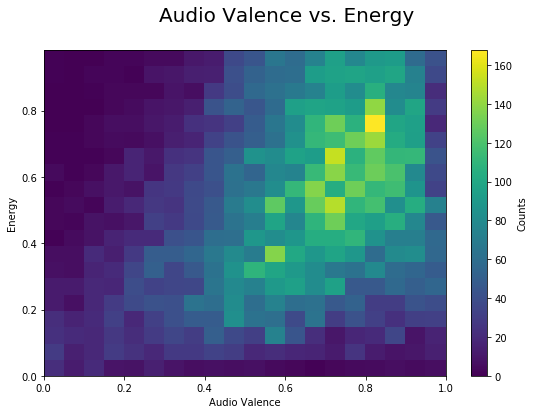

In [7]:
jupyter_figsize = (9,6)
fig, ax = plt.subplots(figsize = jupyter_figsize)
counts, xedges, yedges, hist = ax.hist2d(song_data_df['energy'], song_data_df['audio_valence'], bins=20)
plt.suptitle('Audio Valence vs. Energy', fontsize = 20)
plt.ylabel("Energy")
plt.xlabel("Audio Valence")
plt.colorbar(hist, ax=ax).ax.set_ylabel('Counts')

This histogram is primarily interesting because it illustrates the intensity of energy plotted against the intensity of audio valence. **Energy** is defined as perceptual measure of intensity, such as loudness, noise, and speed. However, this is **NOT** the same as  **tempo**, which refers to beats per minute(BPM). If a song has a high tempo, the perceptual intensity of the song is not necessarily high energy. A song can have a low tempo, yet still have seemingly high energy. A good example of this would be the song ["Snow"](https://youtu.be/yuFI5KSPAt4) by the Red Hot Chili Peppers, which has a BPM of 104, which is considered a "walking pace" tempo, yet still conveys a fast energetic movement with the guitar melody. Now if we consider the second variable in this histogram, **audio valence**, which represents perceptual measure of positivity and cheerfulness, we can see how this illustration can portray possible areas of different genres. For example, low audio valence and high energy could represent genres, such as metal or rap in the upper left hand corner, and the upper right corner could represent songs that are more high energy and audio valence, such as salsa, merengue and other music people dance to. This could be further analyzed if we decide to plot **danceability** versus **audio valence**, which can be seen below.

**2D Histogram - Danceability vs. Audio Valence**

Text(0, 0.5, 'Counts')

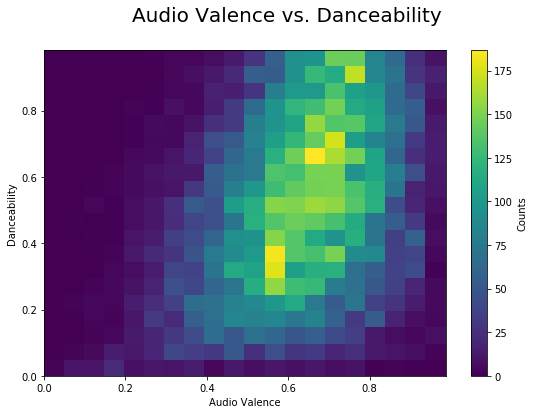

In [8]:
fig, ax = plt.subplots(figsize = jupyter_figsize)
counts, xedges, yedges, hist = ax.hist2d(song_data_df['danceability'], song_data_df['audio_valence'], bins=20)
plt.suptitle('Audio Valence vs. Danceability', fontsize = 20)
plt.ylabel("Danceability")
plt.xlabel("Audio Valence")
plt.colorbar(hist, ax=ax).ax.set_ylabel('Counts')

**Scatter Plot - Danceability vs. Speechiness**

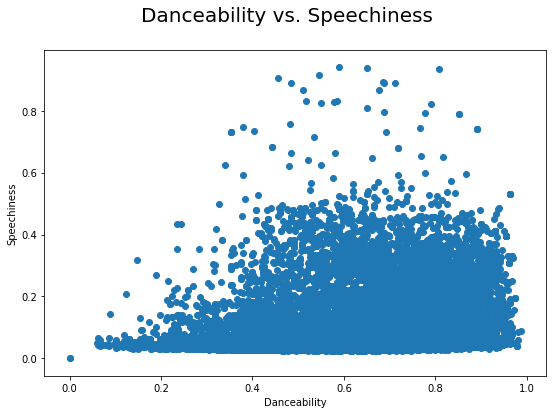

In [9]:
fig, ax = plt.subplots(figsize = jupyter_figsize)
plt.scatter(song_data_df['danceability'], song_data_df['speechiness'])
plt.suptitle('Danceability vs. Speechiness', fontsize = 20)
plt.xlabel('Danceability')
plt.ylabel('Speechiness')
plt.show()

**Speechiness** is defined as the presence of spoken words in music, and typically genres such as rap are considered to be within the ranges of 0.33 and 0.66 for speechiness. As we can see in this scatter plot of **speechiness** versus **danceability**, most songs typically lie beneath the speechiness range that is considered for rap. In terms of the relationship that danceability has with speechiness, we can see that the plot becomes more dense past 0.5 danceability and below 0.3 speechiness.

**Scatter Plot - Energy vs. Speechiness**

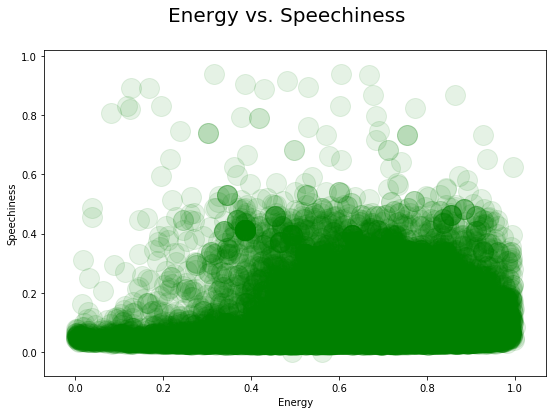

In [10]:
fig, ax = plt.subplots(figsize = jupyter_figsize)
plt.scatter(song_data_df['energy'], song_data_df['speechiness'], color='g', alpha=0.1, s=400)
plt.suptitle('Energy vs. Speechiness', fontsize = 20)
plt.xlabel('Energy')
plt.ylabel('Speechiness')
plt.show()

When we create a scatter plot that plots **energy** and **speechiness**, we can use rap as an example again. If rap songs are typically within the range of 0.33 to 0.66, then it's clear that the majority of rap songs are not typically of high energy. We can consider that songs with the speechiness range of 0.0 to 0.1 and high energy betwen 0.6 to 1.0 could be from genres that are purely instrumental, such as jazz, or other genres, such as metal, bachata, etc. 

**Pie Chart - Audio Valence**

Min Audio Valence 0.0
Max Audio Valence 0.984
Mean Audio Valence 0.527966875497741
90-100%: 1388
80-90% : 1768
70-80% : 2131
60-70% : 2314
50-605 : 2516
40-50% : 2392
30-40% : 2386
20-30% : 1968
10-20% : 1389
 0-10% : 583


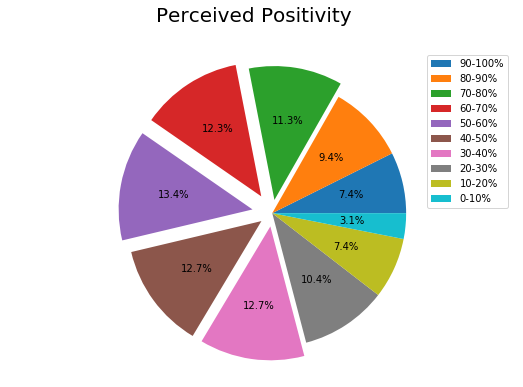

In [11]:
fig, ax = plt.subplots(figsize = jupyter_figsize)
min_valence = min(song_data_df['audio_valence']);
max_valence = max(song_data_df['audio_valence']);
mean_valence = song_data_df['audio_valence'].mean();

p90_100 = len(song_data_df[(song_data_df['audio_valence'] >= 0.9)])
p80_90 = len(song_data_df[(song_data_df['audio_valence'] >= 0.8) & (song_data_df['audio_valence'] < 0.9)])
p70_80 = len(song_data_df[(song_data_df['audio_valence'] >= 0.7) & (song_data_df['audio_valence'] < 0.8)])
p60_70 = len(song_data_df[(song_data_df['audio_valence'] >= 0.6) & (song_data_df['audio_valence'] < 0.7)])
p50_60 = len(song_data_df[(song_data_df['audio_valence'] >= 0.5) & (song_data_df['audio_valence'] < 0.6)])
p40_50 = len(song_data_df[(song_data_df['audio_valence'] >= 0.4) & (song_data_df['audio_valence'] < 0.5)])
p30_40 = len(song_data_df[(song_data_df['audio_valence'] >= 0.3) & (song_data_df['audio_valence'] < 0.4)])
p20_30 = len(song_data_df[(song_data_df['audio_valence'] >= 0.2) & (song_data_df['audio_valence'] < 0.3)])
p10_20 = len(song_data_df[(song_data_df['audio_valence'] >= 0.1) & (song_data_df['audio_valence'] < 0.2)])
p00_10 = len(song_data_df[(song_data_df['audio_valence'] >= 0) & (song_data_df['audio_valence'] < 0.1)])


print("Min Audio Valence", min_valence)
print("Max Audio Valence", max_valence)
print("Mean Audio Valence", mean_valence)
print("90-100%:", p90_100)
print("80-90% :", p80_90)
print("70-80% :", p70_80)
print("60-70% :", p60_70)
print("50-605 :", p50_60)
print("40-50% :", p40_50)
print("30-40% :", p30_40)
print("20-30% :", p20_30)
print("10-20% :", p10_20)
print(" 0-10% :", p00_10)

sizes = [p90_100, p80_90, p70_80, p60_70, p50_60, p40_50, p30_40, p20_30, p10_20, p00_10]
labels = '90-100%', '80-90%', '70-80%', '60-70%', '50-60%', '40-50%', '30-40%', '20-30%', '10-20%', '0-10%'
explode = (0, 0, 0.1, 0.15, 0.15, 0.1, 0.1, 0, 0, 0)

patches, texts, _ = plt.pie(sizes, explode = explode, autopct='%1.1f%%')
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.suptitle('Perceived Positivity', fontsize = 20)
plt.show()

This pie chart illustrates the various ranges of **audio valence**, and the percentages of songs from our data collection within these ranges. As we can see, each range is almost evenly distrubted throughout our data, except for the highest and lowest ranges of audio valence. If we wanted an example of some more positive songs we could do so as below:

In [12]:
happy_songs = song_info_df[song_data_df.audio_valence > 0.9]
happy_songs.head(20)

,artist_name,album_names,playlist
song_name,,,
The Middle,Jimmy Eat World,Bleed American (Deluxe Edition),00s Rock Anthems
Down With the Sickness,Disturbed,The Sickness,00s Rock Anthems
Lento,Rudy Mancuso,Lento,100% LatinX
No Gratis,Messiah,No Gratis,100% LatinX
Finesse (Remix) [feat. Cardi B],Bruno Mars,Finesse (Remix) [feat. Cardi B],100% LatinX
Toxic,Britney Spears,Greatest Hits: My Prerogative,2000s Smash Hits
Pumped Up Kicks,Foster The People,Torches,2000s Smash Hits
Hey Ya! - Radio Mix / Club Mix,OutKast,Speakerboxxx/The Love Below,2000s Smash Hits
SexyBack,Justin Timberlake,FutureSex/LoveSounds,2000s Smash Hits


Alternatively, we can also print out the songs with lowest audio valence:

In [13]:
sad_songs = song_info_df[song_data_df.audio_valence < 0.1]
sad_songs.head(20)

,artist_name,album_names,playlist
song_name,,,
It's Been Awhile,Staind,Break The Cycle,00s Rock Anthems
Beautiful,Christina Aguilera,Stripped,2000s Smash Hits
The End - Remastered,The Doors,The Doors (50th Anniversary Deluxe Edition),60s Rock Anthems
You Are So Beautiful,Joe Cocker,I Can Stand A Little Rain,70s & 80s Acoustic
"Another Brick in the Wall, Pt. 1",Pink Floyd,The Wall,70s Rock Anthems
Hallelujah,Jeff Buckley,Grace,90s Acoustic
Zombie - Acoustic Version,The Cranberries,Something Else,90s Acoustic
Glycerine,Bush,Sixteen Stone (Remastered),90s Pop Rock Essentials
Hallelujah,Jeff Buckley,Grace (Legacy Edition),90s Rock Anthems


**Histogram - Tempo**

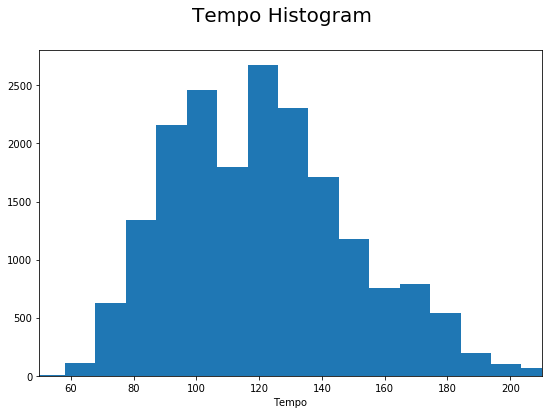

In [14]:
fig, ax = plt.subplots(figsize = jupyter_figsize)
plt.hist(song_data_df['tempo'], bins=25)
plt.suptitle('Tempo Histogram', fontsize = 20)
plt.xlabel('Tempo')
ax.set_xlim([50,210])
plt.show()

As we can see the majority of songs tend to be around 120 BPM, which is not surprising as 120 BPM is considered the most widely used and standard BPM typically used in music. Below is a list of the top 20 songs with **tempo** above 200 BPM:

In [15]:
high_tempo = song_info_df[song_data_df.tempo > 200]
high_tempo.head(20)

,artist_name,album_names,playlist
song_name,,,
Wild Thing,The Troggs,Hit Single Anthology,60s Rock Anthems
Waiting For A Girl Like You,Foreigner,4 [Expanded],80s Love Songs
Around The Way Girl,LL Cool J,Mama Said Knock You Out (Deluxe Edition),90's Hip-Hop Don't Stop
It's The End Of The World As We Know It (And I Feel Fine),R.E.M.,Document (R.E.M. No. 5),90s Pop Rock Essentials
Moves (feat. Snoop Dogg),Olly Murs,Moves (feat. Snoop Dogg),A Perfect Day
FourFiveSeconds,Rihanna,FourFiveSeconds,Acoustic Hits
FourFiveSeconds,Rihanna,FourFiveSeconds,Acoustic Hits_ Oldies but Goodies
Hurtin' Me - The Remix,Stefflon Don,SECURE,Afropop.csv
Maga 2 Mugu,DaVido,Son of Mercy - EP,Afropop.csv


Alternatively, here's a list of the top 20 songs with a **tempo** below 60 BPM: 

In [16]:
slow_tempo = song_info_df[song_data_df.tempo < 60]
slow_tempo.head(20)

,artist_name,album_names,playlist
song_name,,,
Smoke Gets In Your Eyes - Single Version,The Platters,Rock N' Roll Legends,All Out 50s
Losing,H.E.R.,H.E.R. Volume 1,All The Feels
CHANGE,Kwame,Endless Conversations.,Beats n' Bars
Give It to Me,HOMESHAKE,Midnight Snack,Bedroom Pop
Strange Fruit,Billie Holiday,The Complete Commodore/Decca Masters,Black History Salute
Enter,Milo Heart,Enter,Cool Down
Portugal (A Lift),Sea Oleena,S&S Presents: Dreams,Dreamy Vibes
Gina Rodriguez - Latinos Trending Intro,Various Artists,Gina Rodriguez - Latinos Trending Intro,For Puerto Rico Por Puerto Rico
Aura,JFilt,Knodville,Lush Lofi


**Correlation Scatter Plot**

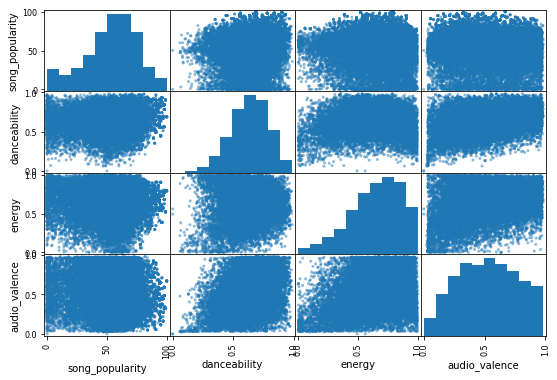

In [17]:
from pandas.plotting import scatter_matrix

scatter = scatter_matrix(song_data_df[[
    'song_popularity', 
    'danceability', 
    'energy',
    'audio_valence'
]], figsize=jupyter_figsize)

This scatter matrix shows the correlations between **speechiness**, **danceability**, **energy**, and **tempo**. Examine how the **danceability** and **energy** are poorly correlated throughout the entire dataframe of 18,835 entries. 

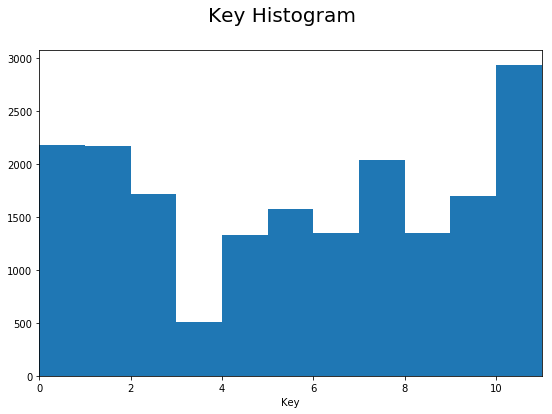

In [32]:
fig, ax = plt.subplots(figsize = jupyter_figsize)
plt.hist(song_data_df['key'], bins=11)
plt.suptitle('Key Histogram', fontsize = 20)
plt.xlabel('Key')
ax.set_xlim([0,11])
plt.show()

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 4:</b> Clustering</blockquote> 

Select a number of numerical columns to be used for your clustering algorithms. Explain the business logic of your clustering. Select expected number of clustering to explore.

<b><font color="blue" size = 4>a)</font>  Cluster Analysis</b>: Explain the business reason for your selection of the number of clusters.

We have decided to utilize three features in our kMeans and kNN clustering, primarily because we wanted to include 3D plots for comparisons to visualize how these algorthims cluster the same songs differently. Thus we decided to take a random sample of 30 songs for each 3D plot. The features that we decided to use for kMeans and kNN 3D plots include **danceability**, **speechiness**, and **audio valence**. However, in our hierarchial clustering, we decided to utlizie all 16 features. We decided to use 10 clusters in each schema of our hierarchial clustering because we felt that it prevented generalizing songs of different genres under the same category. Additionally, in our kNN analysis, we decided to run two separate prediction models. The first prediction model only utilizes three features, a training set of 50 songs, and five cluster groups. The second prediction model includes 200 songs in the training set, includes all 16 features, and categorizes the songs into ten separate clusters. We decided to use two separate models to illustrate how the accuracy improves as we change the amount of clusters, the training set, and the amount of features.  

<b><font color="blue" size = 4>b)</font> k-Means</b>: Cluster your data using k-means. Explain your results. Try two different schemas of clusters.

<b><font color="red" size = 4>Schema 1: Average</font>

**Dendrogram of 30 random songs: Categorized based on Danceability, Speechiness, and Audio Valence**

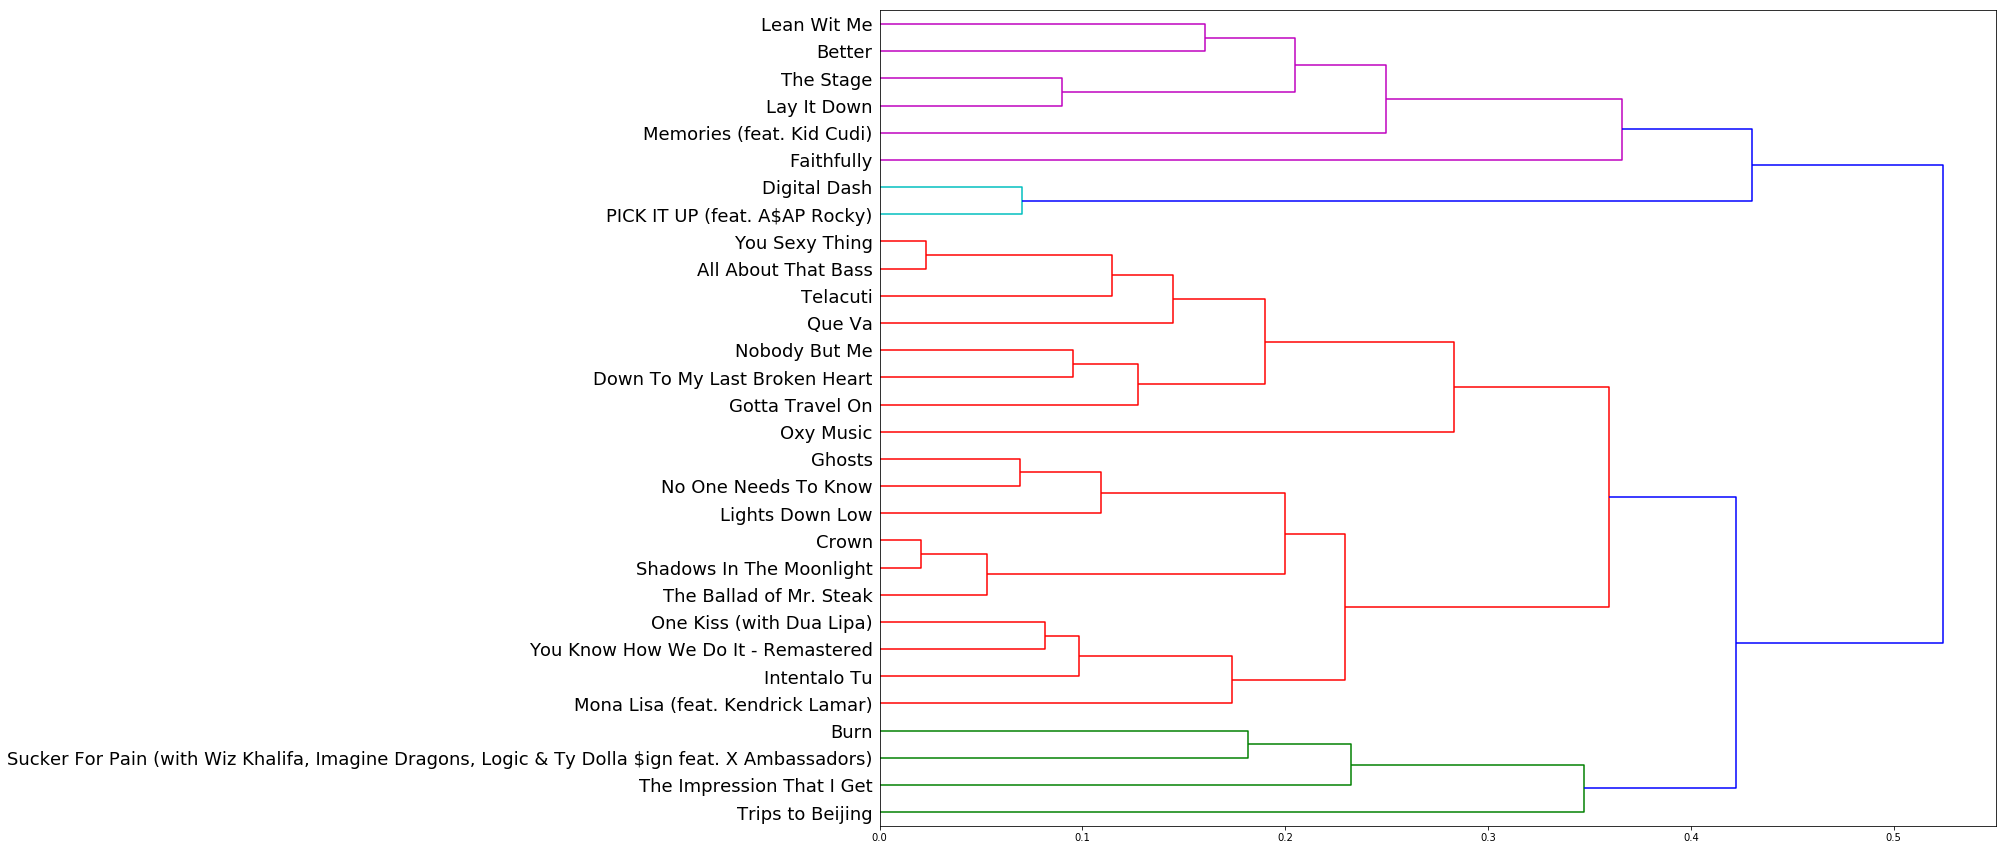

In [22]:
#Sample 30 random songs
sample_df = song_data_df.sample(n = 30, random_state = 3)
sample_df = sample_df[["danceability", "speechiness", "audio_valence"]]
Z = linkage(sample_df, 'average')
plt.figure(figsize = (20,15))
D = dendrogram(Z=Z, orientation = "right", leaf_font_size = 18, labels = sample_df.index)

<b><font color="red" size = 4>Schema 2: Median</font>

**Dendrogram of 30 random songs: Categorized based on Danceability, Speechiness, and Audio Valence**

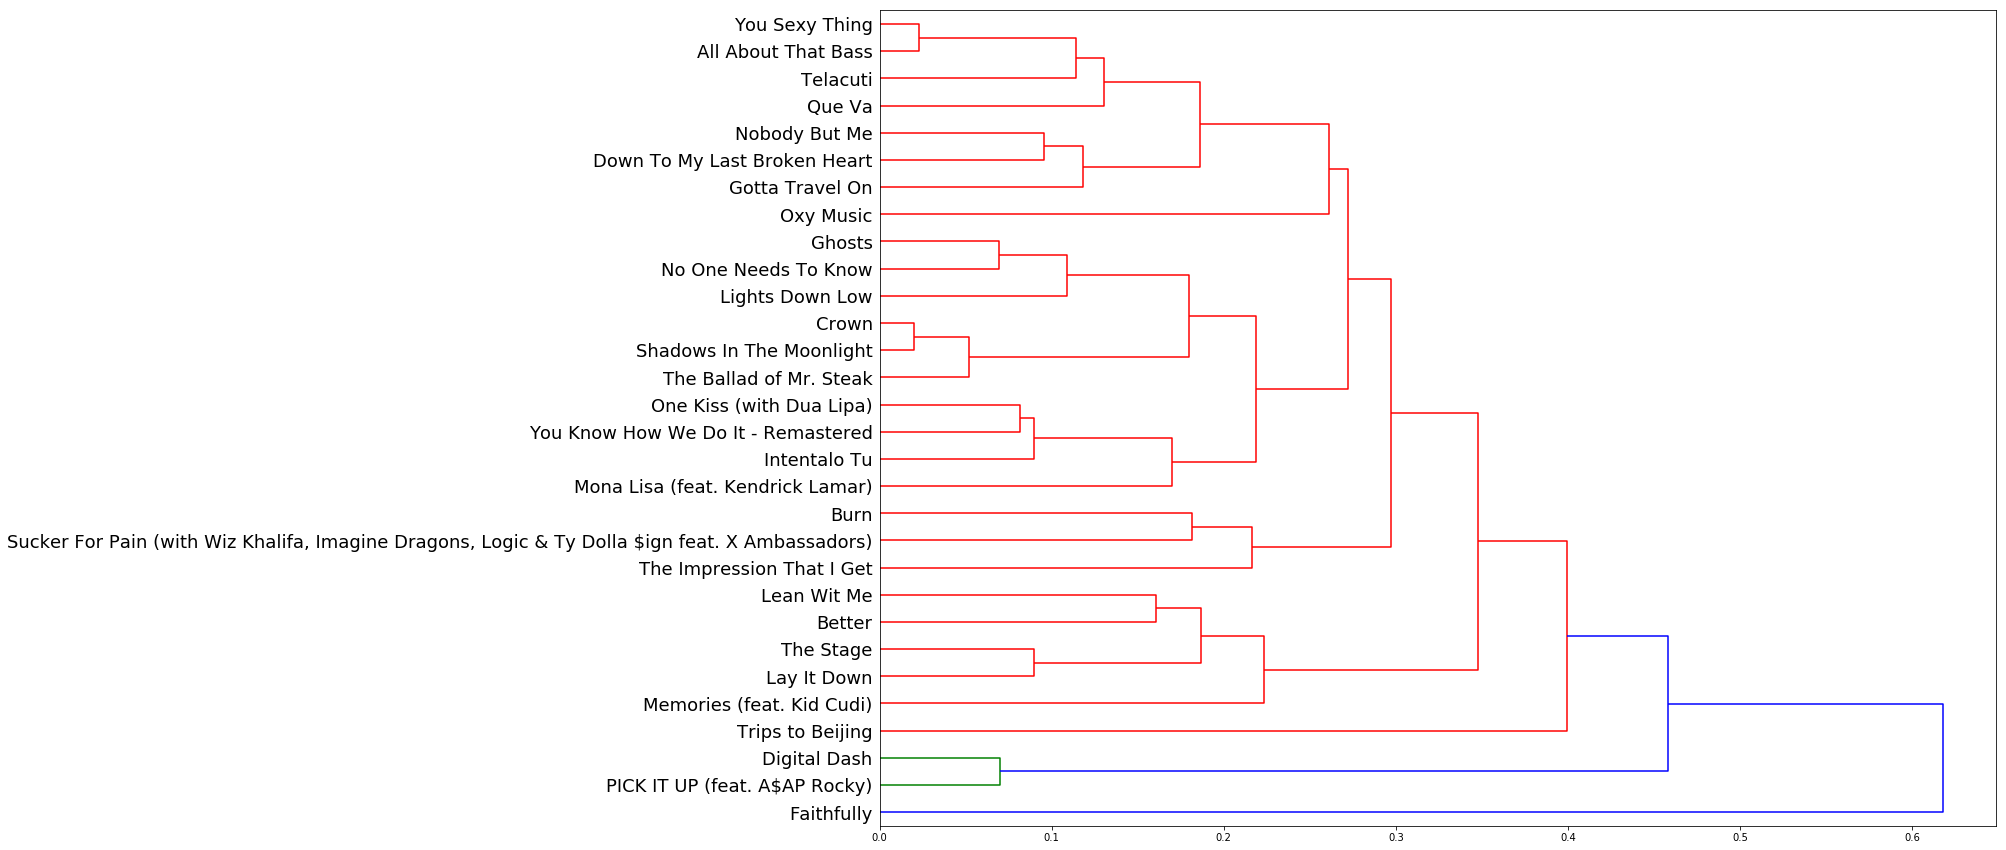

In [23]:
#Median schema
Z = linkage(sample_df, 'median')
plt.figure(figsize = (20,15))
D = dendrogram(Z=Z, orientation = "right", leaf_font_size = 18, labels = sample_df.index)

**3D Plot: Danceability vs. Speechiness vs. Audio Valence**

In [24]:
model = KMeans(n_clusters = 5)
model.fit(sample_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, 'Audio Valence')

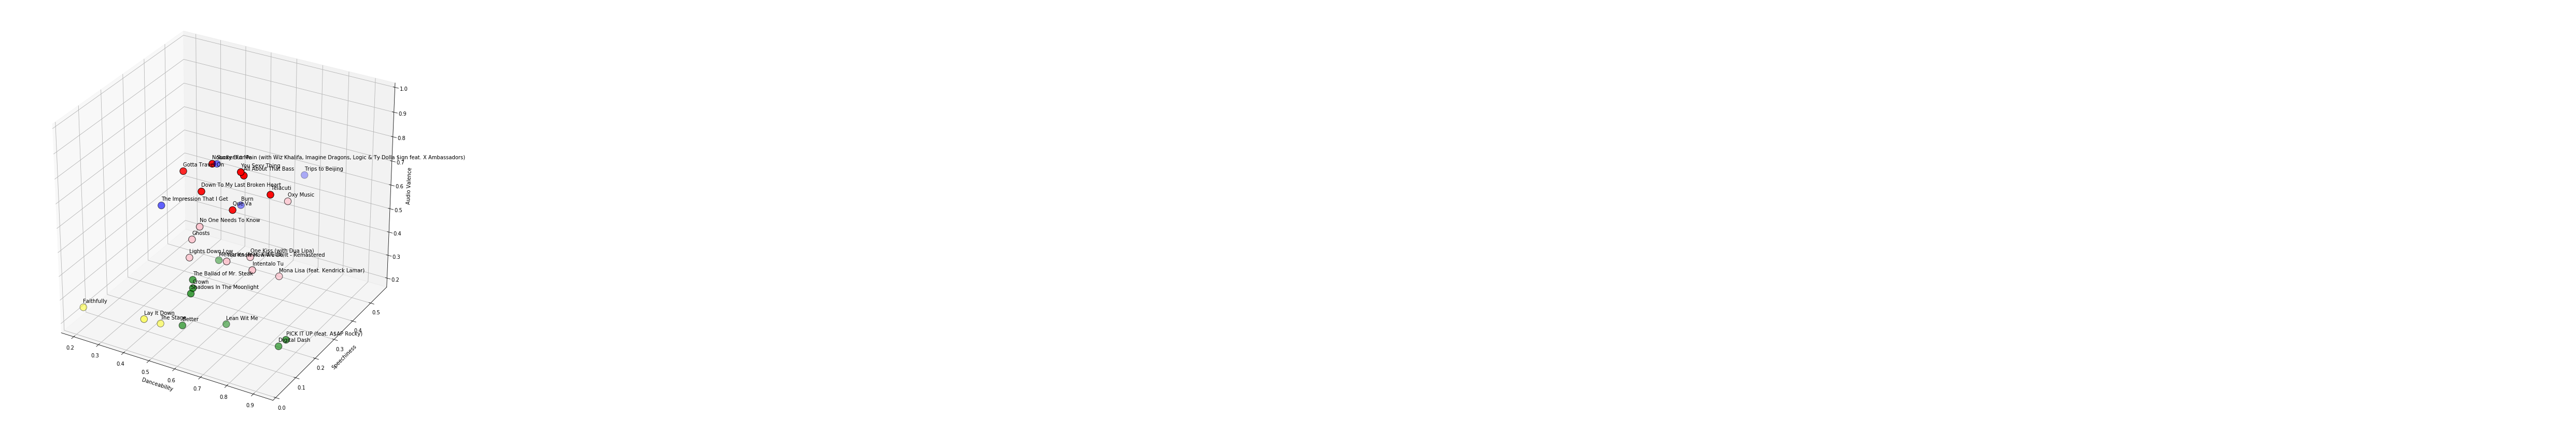

In [25]:
colormap = np.array(['red', 'green', 'blue', "yellow", "pink"])

#size of plot
fig1 = plt.figure(figsize = (15,15))
ax = fig1.add_subplot(111, projection = '3d')

ax.scatter(xs = sample_df.danceability, ys = sample_df.speechiness, zs = sample_df.audio_valence, c = colormap[model.labels_] , cmap = 'viridis', s = 180, edgecolor = 'black', depthshade = True)

for value, dance, speech, valence in sample_df[['danceability', 'speechiness', 'audio_valence']].itertuples(index = True, name = None):
    ax.text(dance, speech, valence + 0.02, value)
    
ax.set_xlabel("Danceability")
ax.set_ylabel("Speechiness")
ax.set_zlabel("Audio Valence")


<b><font color="blue" size = 4>c)</font> Hierarchical Clustering</b>: Cluster your data using hierarchical clustering. Explain your results. Try two different schemas of clusters.

<b><font color="red" size = 4>Schema 1: Average</font>

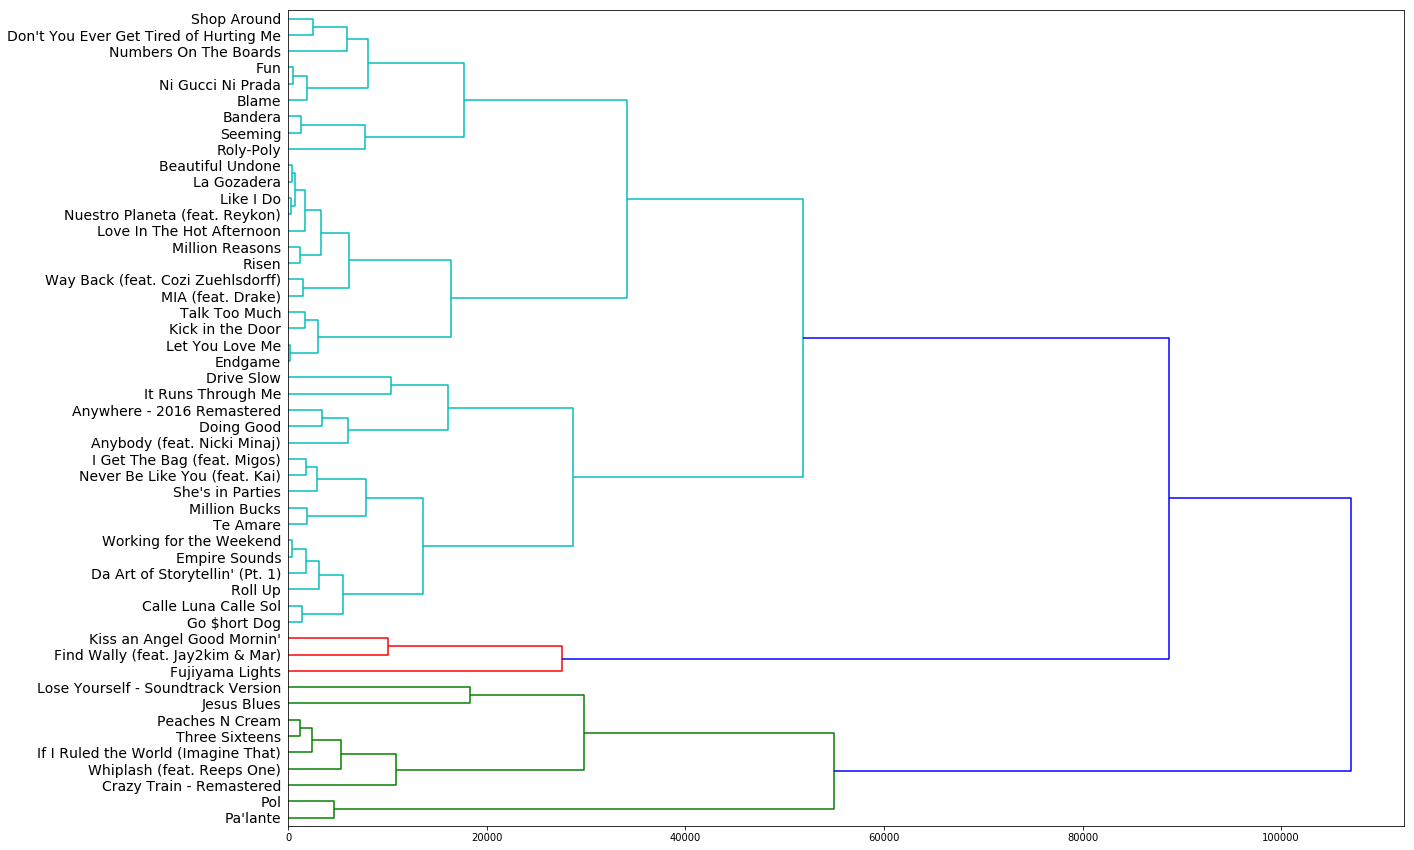

In [26]:
sample_df2 = song_data_df.sample(n = 50, random_state = 9)
Z = linkage(sample_df2, 'average')
plt.figure(figsize = (20,15))
D = dendrogram(Z=Z, orientation = "right", leaf_font_size = 14, labels = sample_df2.index)

In [200]:
ten_categories = fcluster(Z, 10, criterion = 'maxclust')
sample_df2["ten_clust"] = ten_categories

cat1 = sample_df2.loc[(sample_df2["ten_clust"] == 1)].index
cat2 = sample_df2.loc[(sample_df2["ten_clust"] == 2)].index
cat3 = sample_df2.loc[(sample_df2["ten_clust"] == 3)].index
cat4 = sample_df2.loc[(sample_df2["ten_clust"] == 4)].index
cat5 = sample_df2.loc[(sample_df2["ten_clust"] == 5)].index
cat6 = sample_df2.loc[(sample_df2["ten_clust"] == 6)].index
cat7 = sample_df2.loc[(sample_df2["ten_clust"] == 7)].index
cat8 = sample_df2.loc[(sample_df2["ten_clust"] == 8)].index
cat9 = sample_df2.loc[(sample_df2["ten_clust"] == 9)].index
cat10 = sample_df2.loc[(sample_df2["ten_clust"] == 10)].index

print("If we categorize the songs into 10 clusters, they would be grouped as follows: ")

print("\nCluster 1: ")
for elem in cat1:
    print(elem)
    
print("\nCluster 2: ")
for elem in cat2:
    print(elem)
    
print("\nCluster 3: ")
for elem in cat3:
    print(elem)

print("\nCluster 4: ")
for elem in cat4:
    print(elem)
    
print("\nCluster 5: ")
for elem in cat5:
    print(elem)
    
    
print("\nCluster 6: ")
for elem in cat6:
    print(elem)
    
print("\nCluster 7: ")
for elem in cat7:
    print(elem)
    
print("\nCluster 8: ")
for elem in cat8:
    print(elem)
    
print("\nCluster 9: ")
for elem in cat9:
    print(elem)
    
print("\nCluster 10: ")
for elem in cat10:
    print(elem)

If we categorize the songs into 10 clusters, they would be grouped as follows: 

Cluster 1: 
Pa'lante
Pol

Cluster 2: 
Three Sixteens
Crazy Train - Remastered
Whiplash (feat. Reeps One)
Peaches N Cream
If I Ruled the World (Imagine That)

Cluster 3: 
Jesus Blues

Cluster 4: 
Lose Yourself - Soundtrack Version

Cluster 5: 
Find Wally (feat. Jay2kim & Mar)
Kiss an Angel Good Mornin'

Cluster 6: 
Fujiyama Lights

Cluster 7: 
Roll Up
Go $hort Dog
Never Be Like You (feat. Kai)
Empire Sounds
Te Amare
Million Bucks
I Get The Bag (feat. Migos)
Calle Luna Calle Sol
Da Art of Storytellin' (Pt. 1)
She's in Parties
Working for the Weekend

Cluster 8: 
It Runs Through Me
Anybody (feat. Nicki Minaj)
Doing Good
Drive Slow
Anywhere - 2016 Remastered

Cluster 9: 
La Gozadera
Kick in the Door
MIA (feat. Drake)
Endgame
Talk Too Much
Risen
Let You Love Me
Million Reasons
Love In The Hot Afternoon
Way Back (feat. Cozi Zuehlsdorff)
Beautiful Undone
Nuestro Planeta (feat. Reykon)
Like I Do

Cluster 10: 
Ni G

<b><font color="red" size = 4>Schema 2: Median</font>

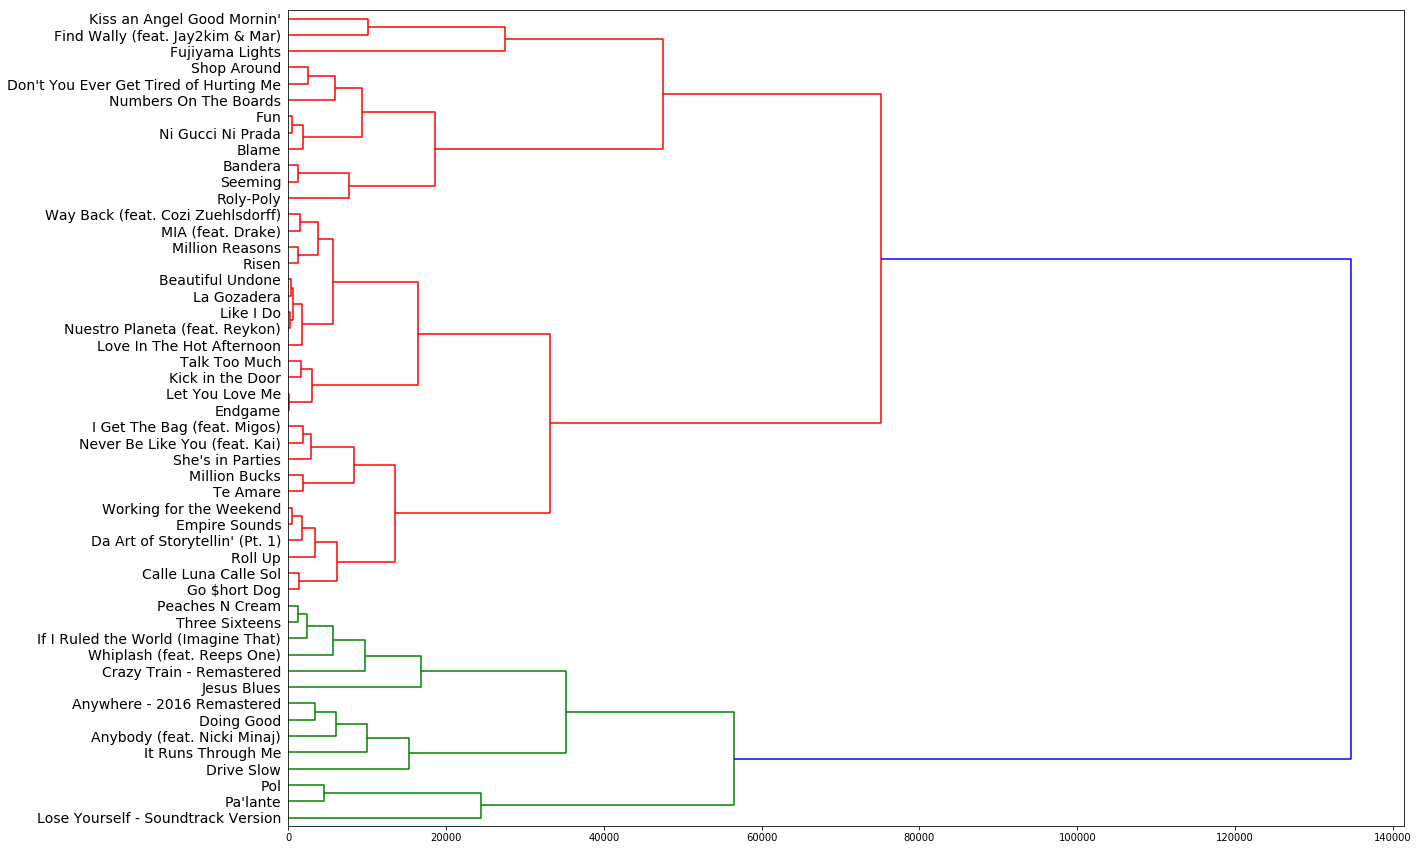

In [27]:
Z = linkage(sample_df2, 'median')
plt.figure(figsize = (20,15))
D = dendrogram(Z=Z, orientation = "right", leaf_font_size = 14, labels = sample_df2.index)

In [28]:
ten_categories = fcluster(Z, 10, criterion = 'maxclust')
sample_df2["ten_clust"] = ten_categories

cat1 = sample_df2.loc[(sample_df2["ten_clust"] == 1)].index
cat2 = sample_df2.loc[(sample_df2["ten_clust"] == 2)].index
cat3 = sample_df2.loc[(sample_df2["ten_clust"] == 3)].index
cat4 = sample_df2.loc[(sample_df2["ten_clust"] == 4)].index
cat5 = sample_df2.loc[(sample_df2["ten_clust"] == 5)].index
cat6 = sample_df2.loc[(sample_df2["ten_clust"] == 6)].index
cat7 = sample_df2.loc[(sample_df2["ten_clust"] == 7)].index
cat8 = sample_df2.loc[(sample_df2["ten_clust"] == 8)].index
cat9 = sample_df2.loc[(sample_df2["ten_clust"] == 9)].index
cat10 = sample_df2.loc[(sample_df2["ten_clust"] == 10)].index

print("If we categorize the songs into 10 clusters, they would be grouped as follows: ")

print("\nCluster 1: ")
for elem in cat1:
    print(elem)
    
print("\nCluster 2: ")
for elem in cat2:
    print(elem)
    
print("\nCluster 3: ")
for elem in cat3:
    print(elem)

print("\nCluster 4: ")
for elem in cat4:
    print(elem)
    
print("\nCluster 5: ")
for elem in cat5:
    print(elem)
    
    
print("\nCluster 6: ")
for elem in cat6:
    print(elem)
    
print("\nCluster 7: ")
for elem in cat7:
    print(elem)
    
print("\nCluster 8: ")
for elem in cat8:
    print(elem)
    
print("\nCluster 9: ")
for elem in cat9:
    print(elem)
    
print("\nCluster 10: ")
for elem in cat10:
    print(elem)

If we categorize the songs into 10 clusters, they would be grouped as follows: 

Cluster 1: 
Pa'lante
Pol

Cluster 2: 
Lose Yourself - Soundtrack Version

Cluster 3: 
It Runs Through Me
Anybody (feat. Nicki Minaj)
Doing Good
Drive Slow
Anywhere - 2016 Remastered

Cluster 4: 
Three Sixteens
Crazy Train - Remastered
Whiplash (feat. Reeps One)
Jesus Blues
Peaches N Cream
If I Ruled the World (Imagine That)

Cluster 5: 
Roll Up
Go $hort Dog
Never Be Like You (feat. Kai)
Empire Sounds
Te Amare
Million Bucks
I Get The Bag (feat. Migos)
Calle Luna Calle Sol
Da Art of Storytellin' (Pt. 1)
She's in Parties
Working for the Weekend

Cluster 6: 
La Gozadera
Kick in the Door
MIA (feat. Drake)
Endgame
Talk Too Much
Risen
Let You Love Me
Million Reasons
Love In The Hot Afternoon
Way Back (feat. Cozi Zuehlsdorff)
Beautiful Undone
Nuestro Planeta (feat. Reykon)
Like I Do

Cluster 7: 
Seeming
Bandera
Roly-Poly

Cluster 8: 
Ni Gucci Ni Prada
Don't You Ever Get Tired of Hurting Me
Blame
Numbers On The Boa

<b><font color="blue" size = 4>d)</font> kNN Clustering</b>: Use your results from the cluster analysis performed in a) or b) and create a short training set. Cluster your data using your training set on kNN. Explain your results.

**Compare 3D Plot to KMeans**

In [29]:
Z = linkage(sample_df, 'ward')
k = 5
dend_clusters = fcluster(Z, k, criterion = 'maxclust')

In [30]:
dend_clusters

array([1, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 4, 4, 1, 5, 4, 2, 3, 4, 4, 4, 5,
       4, 4, 3, 3, 5, 1, 2, 5], dtype=int32)

In [31]:
knn = KNeighborsClassifier(n_neighbors = k, 
                           p = 2)# p=2 for euclidean distance
col_names = sample_df.columns.values
model = knn.fit(sample_df[col_names], dend_clusters)

Text(0.5, 0, 'Audio Valence')

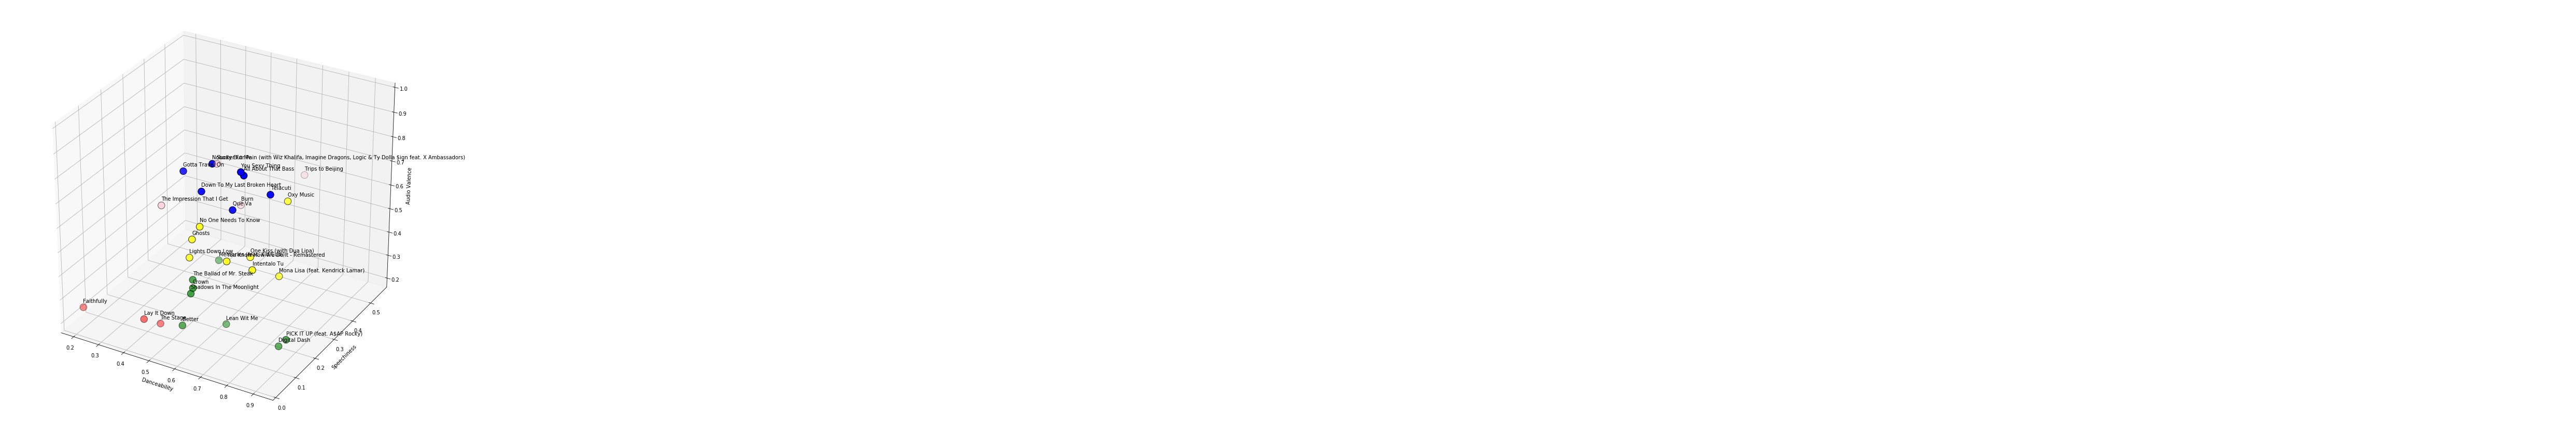

In [32]:
colormap = np.array(["", 'red', 'green', 'blue', "yellow", "pink"])

#size of plot
fig1 = plt.figure(figsize = (15,15))
ax = fig1.add_subplot(111, projection = '3d')

ax.scatter(xs = sample_df.danceability, ys = sample_df.speechiness, zs = sample_df.audio_valence, c = colormap[dend_clusters] , cmap = 'viridis', s = 180, edgecolor = 'black', depthshade = True)

for value, dance, speech, valence in sample_df[['danceability', 'speechiness', 'audio_valence']].itertuples(index = True, name = None):
    ax.text(dance, speech, valence + 0.02, value)
    
ax.set_xlabel("Danceability")
ax.set_ylabel("Speechiness")
ax.set_zlabel("Audio Valence")


**Predictions - Danceability, Speechiness, and Audio Valence**

Below are eight songs that we will use in our predicitons for our model. None of these songs are within the training set. As we first predict

In [33]:
test_song_info = song_info_df.loc[["Dark Necessities", "Love Never Felt so Good", "The Ringer", \
                                    "Fly Me To The Moon - Remastered", "Spit Out the Bone", "I Walk the Line", \
                                   "Mariposa Traicionera", "Unsteady"]]
test_song_info

,artist_name,album_names,playlist
song_name,,,
Dark Necessities,Red Hot Chili Peppers,Dark Necessities,Soak Up the Sun
Love Never Felt so Good,Michael Jackson,XSCAPE,2000s Smash Hits
The Ringer,Eminem,Kamikaze,Beats & Rhymes
Fly Me To The Moon - Remastered,Frank Sinatra,Ultimate Sinatra,ThrowbackThursday
Spit Out the Bone,Metallica,Hardwired…To Self-Destruct,Hard Rock Workout
I Walk the Line,Johnny Cash,I Walk the Line (Original Soundtrack Recording),70s & 80s Acoustic
Mariposa Traicionera,Maná,Six Pack: Maná - EP,Latin Pop Classics
Unsteady,X Ambassadors,VHS,Down In The Dumps


In [34]:
songs =[
    song_data_df.loc["Dark Necessities"],
    song_data_df.loc["Love Never Felt so Good"],
    song_data_df.loc["The Ringer"],
    song_data_df.loc["Fly Me To The Moon - Remastered"],
    song_data_df.loc["Spit Out the Bone"],
    song_data_df.loc["I Walk the Line"],
    song_data_df.loc["Mariposa Traicionera"],
    song_data_df.loc["Unsteady"]
]

song_info = [
    np.array(songs[0][["danceability", "speechiness", "audio_valence"]]).reshape(1,-1),
    np.array(songs[1][["danceability", "speechiness", "audio_valence"]]).reshape(1,-1),
    np.array(songs[2][["danceability", "speechiness", "audio_valence"]]).reshape(1,-1),
    np.array(songs[3][["danceability", "speechiness", "audio_valence"]]).reshape(1,-1),
    np.array(songs[4][["danceability", "speechiness", "audio_valence"]]).reshape(1,-1),
    np.array(songs[5][["danceability", "speechiness", "audio_valence"]]).reshape(1,-1),
    np.array(songs[6][["danceability", "speechiness", "audio_valence"]]).reshape(1,-1),
    np.array(songs[7][["danceability", "speechiness", "audio_valence"]]).reshape(1,-1)
]

predictions = [
    knn.predict(song_info[0])[0],
    knn.predict(song_info[1])[0],
    knn.predict(song_info[2])[0],
    knn.predict(song_info[3])[0],
    knn.predict(song_info[4])[0],
    knn.predict(song_info[5])[0],
    knn.predict(song_info[6])[0],
    knn.predict(song_info[7])[0]
]

print("Predictions:")
for ii in range(0,8):
    info = song_info[ii]
    print(f"{songs[ii].name}")
    print(f"\t {info[0,0]:.2f}, {info[0,1]:.2f}, {info[0,2]:.2f} | Category: {colormap[predictions[ii]]}")

Predictions:
Dark Necessities
	 0.70, 0.07, 0.20 | Category: green
Love Never Felt so Good
	 0.78, 0.04, 0.71 | Category: yellow
The Ringer
	 0.94, 0.29, 0.42 | Category: yellow
Fly Me To The Moon - Remastered
	 0.67, 0.06, 0.45 | Category: green
Spit Out the Bone
	 0.16, 0.09, 0.46 | Category: red
I Walk the Line
	 0.71, 0.04, 0.56 | Category: yellow
Mariposa Traicionera
	 0.77, 0.03, 0.91 | Category: blue
Unsteady
	 0.39, 0.06, 0.20 | Category: red


If we look at the results of our predictions utilizing five clusters, we can see that it is not very accurate at categorizing the songs of similar features into the same cluster. This can be seen just by listening to samples of the songs that are categorized into the "yellow" cluster.

**Yellow Cluster**:

[Love Never Felt so Good](https://youtu.be/TTzD6gWV16s?t=16)

[The Ringer](https://youtu.be/6N8E55sjHYc?t=67)

[I Walk The Line](https://youtu.be/oQFicmUfKi4?t=21)

This inaccuracy in our prediction model can be attributed to several factors. One big reason is that we are classifying these groups with only three features that include **danceability**, **speechiness**, and **audio valence**. This immediately will classify songs incorrectly because the complexity of song classification must take into consideration several different variables. If we were to analyze how all the songs within the "yellow" cluster are similar, the main similarity would simply be **danceability** as shown in the printed prediction values. Thus it is apparent that three features alone aren't enough to properly categorize our data, nor is the use of only five clusters.

**Prediction - All Features**

Now we will test a separate kNN model, that uses a sample size of 200 random songs as our trainig set, utilizes all 16 features from our data, and increases the clusters to 10. We will see how the clusters begin to become more accurate, and from this understanding we can see that as the cluster numbers and features increase, the accuracy of our model begins to improve by correctly placing similar songs into the same categories. For this prediction example, we will predict the clusters for ten songs listed below that are not included in our training set. 

In [37]:
test_song_info = song_info_df.loc[["Dark Necessities", "Love Never Felt so Good", "The Stage", \
                                    "Fly Me To The Moon - Remastered", "Spit Out the Bone", "I Walk the Line", \
                                   "Mariposa Traicionera", "Unsteady", "The Ringer", "Cinderella Man"]]
test_song_info

,artist_name,album_names,playlist
song_name,,,
Dark Necessities,Red Hot Chili Peppers,Dark Necessities,Soak Up the Sun
Love Never Felt so Good,Michael Jackson,XSCAPE,2000s Smash Hits
The Stage,Avenged Sevenfold,The Stage,The GRAMMYs Official Playlist
Fly Me To The Moon - Remastered,Frank Sinatra,Ultimate Sinatra,ThrowbackThursday
Spit Out the Bone,Metallica,Hardwired…To Self-Destruct,Hard Rock Workout
I Walk the Line,Johnny Cash,I Walk the Line (Original Soundtrack Recording),70s & 80s Acoustic
Mariposa Traicionera,Maná,Six Pack: Maná - EP,Latin Pop Classics
Unsteady,X Ambassadors,VHS,Down In The Dumps
The Ringer,Eminem,Kamikaze,Beats & Rhymes


In [38]:
sample_df = song_data_df.sample(n = 200, random_state = 10)
Z = linkage(sample_df, 'ward')
k = 10
dend_clusters = fcluster(Z, k, criterion = 'maxclust')

In [39]:
dend_clusters

array([ 6,  5,  5,  5,  8,  6,  2, 10, 10,  2,  9,  3,  9,  3,  6,  5,  3,
        9,  3,  5,  8,  2,  5,  5,  3,  9,  5,  9,  4,  6,  3,  5,  3,  8,
        4,  6,  3,  9,  3,  3,  3,  3,  3,  4,  5,  4,  5,  3,  4,  5,  9,
        2,  2, 10, 10,  4,  4,  2,  3, 10,  2,  2,  3,  6,  5,  5,  3,  2,
        3,  3,  5,  5,  3,  5,  5,  2, 10,  3,  4,  4,  9,  5,  5,  5,  9,
        8,  5,  5,  8,  4,  5,  3,  3,  3,  2,  2,  5,  5,  8, 10,  3,  1,
        5,  5,  3,  9,  3, 10, 10,  5,  1, 10, 10,  5,  2,  3,  4,  3,  5,
        9,  5,  6,  3,  5,  5,  9,  4,  6,  5,  2,  2, 10,  3,  2,  5,  3,
        4,  9,  2,  5,  9,  2,  4,  2, 10, 10,  9,  9,  3,  2,  5,  3,  5,
        2,  3,  9,  6,  7,  2,  2,  2,  3,  4,  5,  5,  6,  6,  5,  3,  9,
        4,  2,  3,  8,  2,  3,  2,  2,  9,  3,  2,  8,  8,  2,  5,  5,  5,
        2,  1,  4,  4,  4,  4,  3,  2,  5,  5,  2,  2,  9], dtype=int32)

In [40]:
colormap = np.array(["", 'red', 'green', 'blue', "yellow", "pink", "orange", "purple", "gray", "magenta", "brown"])
knn = KNeighborsClassifier(n_neighbors = k, 
                           p = 2)# p=2 for euclidean distance
col_names = sample_df.columns.values
model = knn.fit(sample_df[col_names], dend_clusters)

In [41]:
song1 = np.array(song_data_df.loc["Dark Necessities"]).reshape(1,-1)
song2 = np.array(song_data_df.loc["Love Never Felt so Good"]).reshape(1,-1)
song3 = np.array(song_data_df.loc["The Stage"]).reshape(1,-1)
song4 = np.array(song_data_df.loc["Fly Me To The Moon - Remastered"]).reshape(1,-1)
song5 = np.array(song_data_df.loc["Spit Out the Bone"]).reshape(1,-1)
song6 = np.array(song_data_df.loc["I Walk the Line"]).reshape(1,-1)
song7 = np.array(song_data_df.loc["Mariposa Traicionera"]).reshape(1,-1)
song8 = np.array(song_data_df.loc["Unsteady"]).reshape(1,-1)
song9 = np.array(song_data_df.loc["The Ringer"]).reshape(1,-1)
song10 = np.array(song_data_df.loc["Cinderella Man"]).reshape(1,-1)

prediction1 = knn.predict(song1)[0]
prediction2 = knn.predict(song2)[0]
prediction3 = knn.predict(song3)[0]
prediction4 = knn.predict(song4)[0]
prediction5 = knn.predict(song5)[0]
prediction6 = knn.predict(song6)[0]
prediction7 = knn.predict(song7)[0]
prediction8 = knn.predict(song8)[0]
prediction9 = knn.predict(song9)[0]
prediction10 = knn.predict(song10)[0]


print("Prediction Song: Dark Necessities, classification: ", colormap[prediction1], "\n")
print("Prediction Song: Love Never Felt so Good, classification: ", colormap[prediction2], "\n")
print("Prediction Song: The Stage, classification: ", colormap[prediction3], "\n")
print("Prediction Song: Fly Me To The Moon, classification: ", colormap[prediction4], "\n")
print("Prediction Song: Spit Out the Bone, classification: ", colormap[prediction5], "\n")
print("Prediction Song: I Walk the Line, classification: ", colormap[prediction6], "\n")
print("Prediction Song: Mariposa Traicionera, classification: ", colormap[prediction7], "\n")
print("Prediction Song: Unsteady, classification: ", colormap[prediction8], "\n")
print("Prediction Song: The Ringer, classification: ", colormap[prediction9], "\n")
print("Prediction Song: Cinderella Man, classification: ", colormap[prediction10], "\n")

Prediction Song: Dark Necessities, classification:  brown 

Prediction Song: Love Never Felt so Good, classification:  blue 

Prediction Song: The Stage, classification:  orange 

Prediction Song: Fly Me To The Moon, classification:  green 

Prediction Song: Spit Out the Bone, classification:  orange 

Prediction Song: I Walk the Line, classification:  green 

Prediction Song: Mariposa Traicionera, classification:  magenta 

Prediction Song: Unsteady, classification:  pink 

Prediction Song: The Ringer, classification:  gray 

Prediction Song: Cinderella Man, classification:  brown 



We can analyze these categories and see that the clustering is becoming more accurate as we increase the number of clusters, and utilize all the features. Let's take a look at the orange cluster.

**Orange Cluster**:

[Spit Out the Bone](https://youtu.be/5Wb2ArX_SM0?t=69)

[The Stage](https://youtu.be/2oK0a9IiRMc?t=99)

We can see that both of these songs would potentially fall under the category of rock/metal after listening to the samples above, and we can also view the similarities in their features below:

In [42]:
print("Orange Cluster:\n", song_data_df.loc[["The Stage", "Spit Out the Bone"]])

Orange Cluster:
                    song_popularity  song_duration_ms  acousticness  \
song_name                                                            
The Stage                       42            512024      0.000363   
Spit Out the Bone               53            429198      0.000009   

                   danceability  energy  instrumentalness  key  liveness  \
song_name                                                                  
The Stage                 0.454   0.945            0.3230    9     0.108   
Spit Out the Bone         0.157   0.987            0.0628    9     0.151   

                   loudness  audio_mode  speechiness    tempo  time_signature  \
song_name                                                                       
The Stage            -6.925           0       0.0975  134.945               4   
Spit Out the Bone    -3.739           1       0.0910  167.949               4   

                   audio_valence  tempo_vs_dance  dance_vs_speech  
song

From here we can see that these two songs are closely related in duration, energy, key, liveness, speechiness, and time_signature. Therefore, we can see that the model is becoming more accurate at clustering songs. However, there are still other songs that are clustered together that still vary greaty. However one interesting cluster was the brown cluster that included the following songs:


[Dark Neccessities](https://youtu.be/Q0oIoR9mLwc?t=52)

[Cinderella Man](https://youtu.be/MppJa48qALg?t=33)

We wanted to include music that is difficult to define under one genre, specifically with the Red Hot Chili Peppers that utilize influences from rap, rock, funk, etc. Thus it was impressive to see that a song, such as "Dark Necessities", was classified with "Cinderella Man". Taking a closer look reveals the similarities that these songs had in their audio features:

In [43]:
print("Orange Cluster:\n", song_data_df.loc[["Dark Necessities", "Cinderella Man"]])

Orange Cluster:
                   song_popularity  song_duration_ms  acousticness  \
song_name                                                           
Dark Necessities               58            302000        0.0722   
Cinderella Man                 74            279013        0.2340   

                  danceability  energy  instrumentalness  key  liveness  \
song_name                                                                 
Dark Necessities         0.700   0.742            0.0199    5    0.1100   
Cinderella Man           0.679   0.908            0.0000    8    0.0821   

                  loudness  audio_mode  speechiness   tempo  time_signature  \
song_name                                                                     
Dark Necessities    -6.777           0       0.0716  91.959               4   
Cinderella Man      -3.411           1       0.2020  85.918               4   

                  audio_valence  tempo_vs_dance  dance_vs_speech  
song_name            

The similarities in these two songs included **tempo**, **tempo vs. danceability**, **danceability**, **song duration**, **time signature**, **energy**, and **danceability**.

<blockquote style="border: 2px solid #666; padding: 10px; background-color: #acc;"><b>Question 5:</b> Summary</blockquote> 

<b><font color="blue" size = 4>a)</font> Project Summary</b>: Write a few sentences about the result of this project. How can your stakeholder benefit from the results of your project? Which changes or adaptations can your stakehoders make now that he has your results?

The result of this project revealed a lot of interesting insight on how Spotify categorizes music based on the attributes listed in their API. It especially reveals how Spotify can use this data to recommend music to target audiences of specific genres, or even recommend music based off qualities, such as danceability. Thus based off of these attributes, Spotify can cluster music into such specific categories that if they can define a uesr's taste in music with these attributes, they can target them to continue listening to more music by automatically adding recommended songs to playlists, or by creating radio stations of similar playlists.   

<b><font color="blue" size = 4>b)</font> Project Report</b>: Write a formal report to your stakeholders with the summary of your report 

Previously, we stated that we could cluster and classify songs using a song's characteristics. Using Spotify's API, we were able to obtain different characteristics for each song. These characteristics ranged from **tempo** to **danceability**, **speechiness**, etc. After visualizing different correlations and distributions of song characteristics, we decided to use **danceability**, **speechiness**, **audio valence** to characterize a small sample dataset. At first, we only used three features to visualize the cluster groups in a 3D plot. Using this kNN model with three features, we attempted to classify eight sample songs, but as expected, the models classified songs based off similar features that still seemed inaccurate when classifying songs of different sounds. Therefore, the lack of greater features caused the model to cluster songs that similar based off one feature, but listening to the audio revealed that songs clustered together were still from vastly different genres of music. To improve the model we decided to demonstrate that by increasing the number of clusters, utilizing all features, and increasing the training data set. We were able to show that our model shows improvement in accuracy in clustering songs, by accurately categorizing songs of similar genres, sounds, and rhythms. Overall, this demonstration shows that these classifications will let individuals find similar sounding music. Ultimately a model such as this could be integrated into Spotify's recommendation system when users are adding new music to their playlists. 